# Tutorial 06

## template fitting pipeline pre-process

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import afra as af
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

NSIDE = 128
fwhm = [0.5*np.pi/180.,0.3*np.pi/180.,0.2*np.pi/180.,0.08*np.pi/180.]  # FWHM for beam effect

map30f = hp.read_map('./data/pysm_s1d1_30.fits',field=[0,1,2],dtype=np.float32,verbose=0)
map95f = hp.read_map('./data/pysm_s1d1_95.fits',field=[0,1,2],dtype=np.float32,verbose=0)
map150f = hp.read_map('./data/pysm_s1d1_150.fits',field=[0,1,2],dtype=np.float32,verbose=0)
map353f = hp.read_map('./data/pysm_s1d1_353.fits',field=[0,1,2],dtype=np.float32,verbose=0)
cmb_cl = hp.read_cl('./data/camb_cls.fits')

vmap30 = hp.read_map('./data/plkvar_30.fits',field=[0,1,2],dtype=np.float32,verbose=0)
vmap95 = hp.read_map('./data/alivar_95.fits',field=[0,1,2],dtype=np.float32,verbose=0)
vmap150 = hp.read_map('./data/alivar_150.fits',field=[0,1,2],dtype=np.float32,verbose=0)
vmap353 = hp.read_map('./data/plkvar_353.fits',field=[0,1,2],dtype=np.float32,verbose=0)

nmap30 = np.random.normal(0.,1.,size=vmap30.shape)*np.sqrt(vmap30)
nmap95 = np.random.normal(0.,1.,size=vmap95.shape)*np.sqrt(vmap95)
nmap150 = np.random.normal(0.,1.,size=vmap150.shape)*np.sqrt(vmap150)
nmap353 = np.random.normal(0.,1.,size=vmap353.shape)*np.sqrt(vmap353)

ell = np.arange(cmb_cl.shape[1])
mapcmb = hp.synfast(cmb_cl,nside=NSIDE,new=True,verbose=0)
map30 = hp.smoothing(mapcmb+map30f,fwhm=fwhm[0],verbose=0)+nmap30
map95 = hp.smoothing(mapcmb+map95f,fwhm=fwhm[1],verbose=0)+nmap95
map150 = hp.smoothing(mapcmb+map150f,fwhm=fwhm[2],verbose=0)+nmap150
map353 = hp.smoothing(mapcmb+map353f,fwhm=fwhm[3],verbose=0)+nmap353

fullmap = dict()
fullmap[95] = map95
fullmap[150] = map150

fullvar = dict()
fullvar[95] = vmap95
fullvar[150] = vmap150

fullbeam = dict()
fullbeam[95] = fwhm[1]
fullbeam[150] = fwhm[2]

tmpmap = dict()
tmpmap[30] = map30f
tmpmap[353] = map353f

tmpbeam = dict()
tmpbeam[30] = fwhm[0]
tmpbeam[353] = fwhm[3]

mask = hp.read_map('./data/ali_mask.fits',dtype=bool,verbose=0)

#### simple likelihood pre-process

- T mode

CPU times: user 18min 58s, sys: 1.98 s, total: 19min
Wall time: 2min 28s


<AxesSubplot:>

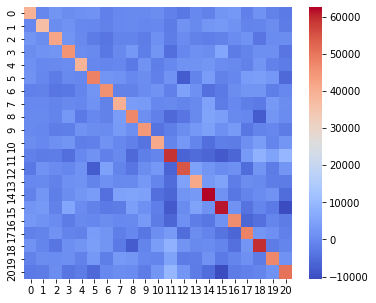

In [2]:
%%time

TARGET = 'T'
NSAMP = 30
APOSCALE = 6.
PSBIN = 20
LMIN = 50
LMAX = 200

pipeline = af.tpfpipe(fullmap,mask=mask,variances=fullvar,fwhms=fullbeam,
                      templates=tmpmap,template_fwhms=tmpbeam,target=TARGET)
rslt_t = pipeline.preprocess(aposcale=APOSCALE,psbin=PSBIN,lmin=LMIN,lmax=LMAX,nsamp=NSAMP)

fig,ax = plt.subplots(figsize=(6,5))
sns.heatmap(rslt_t[3],cmap='coolwarm',annot=False,ax=ax)

- E mode

CPU times: user 35min 47s, sys: 2.23 s, total: 35min 49s
Wall time: 4min 35s


<AxesSubplot:>

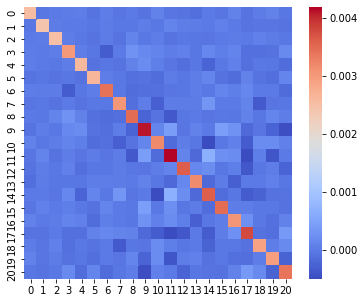

In [3]:
%%time

TARGET = 'E'
pipeline.target = TARGET
rslt_e = pipeline.preprocess(aposcale=APOSCALE,psbin=PSBIN,lmin=LMIN,lmax=LMAX,nsamp=NSAMP)

fig,ax = plt.subplots(figsize=(6,5))
sns.heatmap(rslt_e[3],cmap='coolwarm',annot=False,ax=ax)

- B mode

CPU times: user 35min 14s, sys: 2.76 s, total: 35min 16s
Wall time: 4min 34s


<AxesSubplot:>

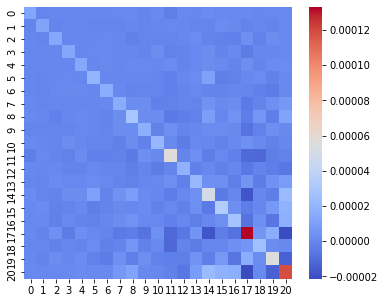

In [4]:
%%time

TARGET = 'B'
pipeline.target = TARGET
rslt_b = pipeline.preprocess(aposcale=APOSCALE,psbin=PSBIN,lmin=LMIN,lmax=LMAX,nsamp=NSAMP)

fig,ax = plt.subplots(figsize=(6,5))
sns.heatmap(rslt_b[3],cmap='coolwarm',annot=False,ax=ax)

#### window function matrix (top-hat according to NaMaster)

<AxesSubplot:>

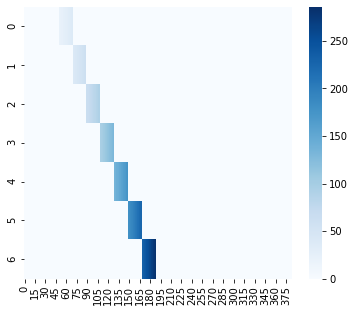

In [5]:
from afra.tools.ps_estimator import pstimator
from afra.tools.aux import bp_window

est = pstimator(nside=NSIDE,mask=mask,aposcale=APOSCALE,psbin=PSBIN,lmin=LMIN,lmax=LMAX)
window = bp_window(est)

fig,ax = plt.subplots(figsize=(6,5))
sns.heatmap(window,cmap='Blues',annot=False,ax=ax)

end